In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv('delivery_time.csv')

In [3]:
print(df.head())


   Delivery Time  Sorting Time
0          21.00            10
1          13.50             4
2          19.75             6
3          24.00             9
4          29.00            10


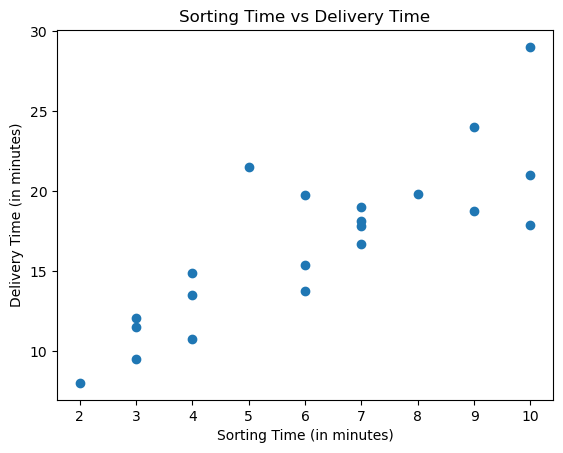

In [4]:
plt.scatter(df['Sorting Time'], df['Delivery Time'])
plt.title('Sorting Time vs Delivery Time')
plt.xlabel('Sorting Time (in minutes)')
plt.ylabel('Delivery Time (in minutes)')
plt.show()


In [5]:
X = df[['Sorting Time']]
y = df['Delivery Time']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [8]:
y_pred = model.predict(X_test)

In [9]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [10]:
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2): {r2}')

Mean Squared Error (MSE): 14.046738956635016
R-squared (R2): -1.0207599586367362


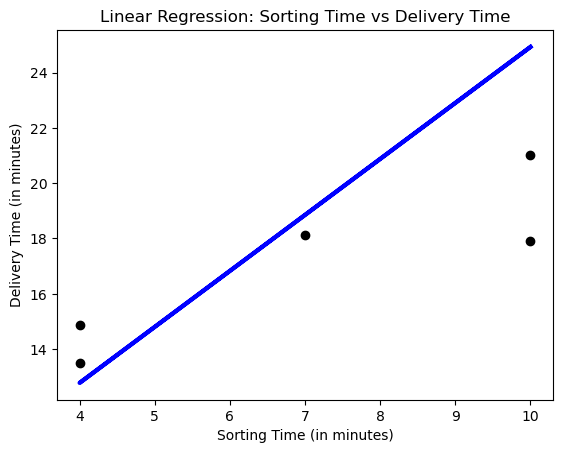

In [11]:
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.title('Linear Regression: Sorting Time vs Delivery Time')
plt.xlabel('Sorting Time (in minutes)')
plt.ylabel('Delivery Time (in minutes)')
plt.show()